In [ ]:
from programs.sigma_clipping import FastSigmaClipping
from programs.standard_deviation import FastStandardDeviation
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

filepath = '/home/avoyeux/Documents/work_codes/sigma_clipping_tests/results/solo_L1_spice-n-ras_20250801T121921_V01_335544522-000.fits'

In [16]:
def show_data_image(data, lambda_index, title, min_max=None):
    data_ = np.copy(data)
    image = data_[lambda_index, :, :]
    plt.figure(figsize=(8, 6))
    if min_max is None:
        plt.imshow(image, origin='lower', cmap='inferno', aspect=0.25)  # aspect supposed to be 1/step
    else:
        plt.imshow(image, origin='lower', cmap='inferno', aspect=0.25, vmin=min_max[0], vmax=min_max[1])
    plt.colorbar(label='Intensity')
    plt.title(f"{title}")  #  (lambda_index={lambda_index})
    plt.show()


data type uint16
Original data shape: (1, 16, 768, 192)


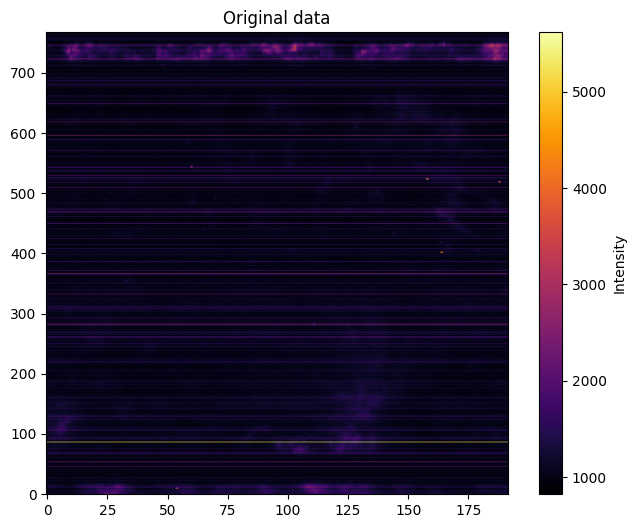

In [30]:
hdul = fits.open(filepath)
data = hdul[1].data
print(f'data type {data.dtype}')
original_data = data[0]  # remove t dimension
lambda_index = int(original_data.shape[0] / 2)
print('Original data shape:', data.shape)
show_data_image(original_data, lambda_index, "Original data")

original_data data shape: (16, 768, 192)
StandardDeviation.__init__ started on Fri Dec 19 17:00:06 2025.
StandardDeviation.__init__ ended on Fri Dec 19 17:00:06 2025 (0.08s).


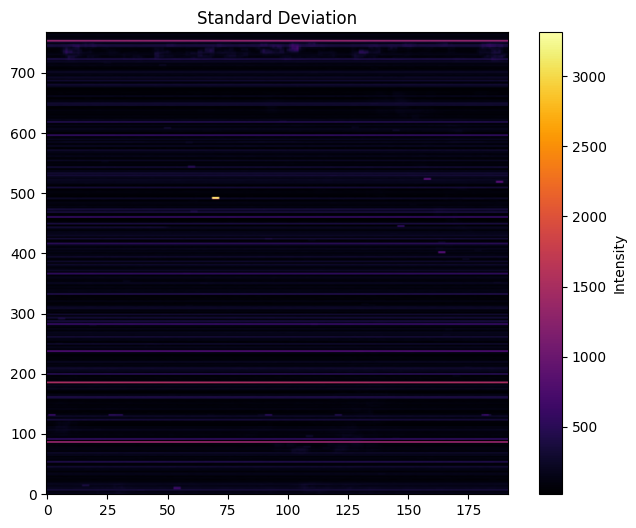

In [ ]:
print(f"original_data data shape: {original_data.shape}")
std = FastStandardDeviation(
    data=original_data,
    kernel=(3, 3, 3),
    with_NaNs=True,
).sdev
show_data_image(std, lambda_index, "Standard Deviation")
